In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### No missing values

In [5]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EDAB0F46D8>,
      dtype=object)

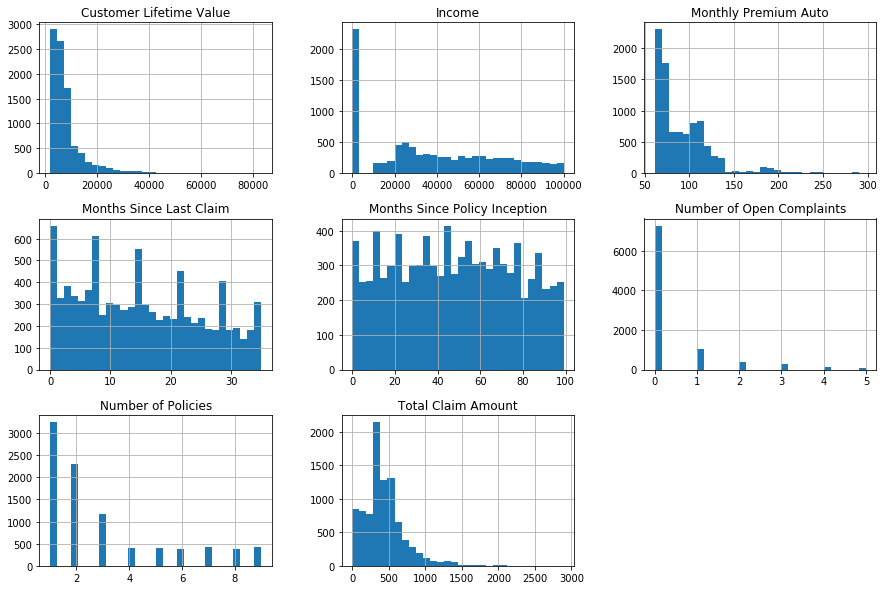

In [6]:
df.hist(bins=30, figsize=(15, 10))

### Examine Income values equal to 0

- Probably the values are missing or people in a survey did not share such personal information
- Let's examine how many of them did not provide this information
- After this examination let's decide how to deal with them

In [7]:
df[['Income', 'EmploymentStatus']]

,Income,EmploymentStatus
0,56274,Employed
1,0,Unemployed
2,48767,Employed
3,0,Unemployed
4,43836,Employed
...,...,...
9129,71941,Employed
9130,21604,Employed
9131,0,Unemployed
9132,21941,Employed


In [8]:
df[(df['Income'] == 0) & (df['EmploymentStatus'] != 'Unemployed')].shape

(0, 24)

### We can see that the only unemployed people have 0 income

In [9]:
df['Customer Lifetime Value']

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: Customer Lifetime Value, Length: 9134, dtype: float64

### Creating a box plot for each numeric feature 

In [10]:
numeric_features = df._get_numeric_data().drop(['Number of Open Complaints', 'Number of Policies'], axis=1).columns
numeric_features

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Total Claim Amount'],
      dtype='object')

In [11]:
def create_boxplots(dataframe, numeric_cols):
    for col in numeric_cols:
        plt.figure()
        dataframe[[col]].boxplot()

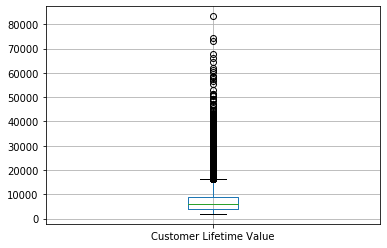

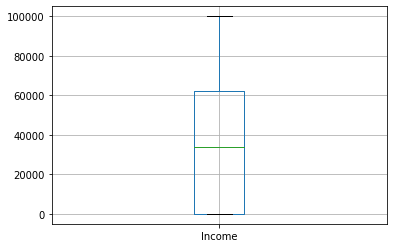

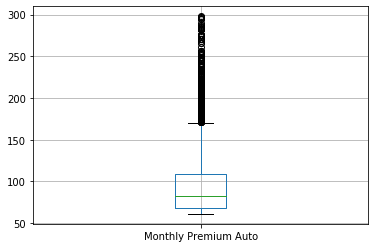

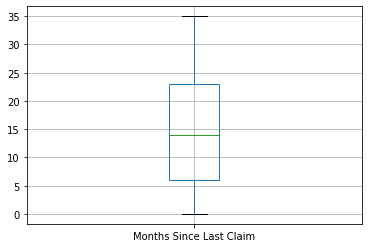

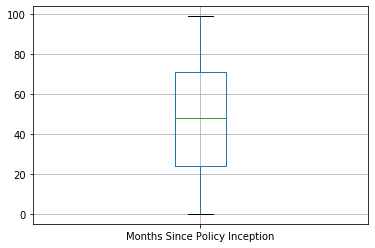

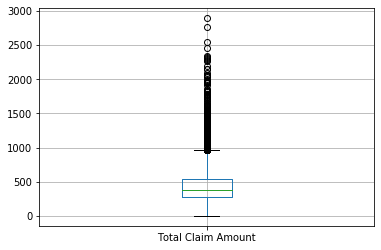

In [12]:
create_boxplots(df, numeric_features)

# Removing outliers

In [13]:
df.shape

(9134, 24)

### Removing  points which are smaller or larger than the 3 standard deviations

In [14]:
for col in numeric_features:
    col_mean = df[col].mean()
    col_std = df[col].std()
    boundary = 3 * col_std
    lower_boundary, upper_boundary = col_mean - boundary, col_mean + boundary
    df_clean = df[(df[col] < upper_boundary) & (df[col] > lower_boundary)]

In [15]:
df_clean.shape

(8976, 24)

### Removing  points using value quantiles

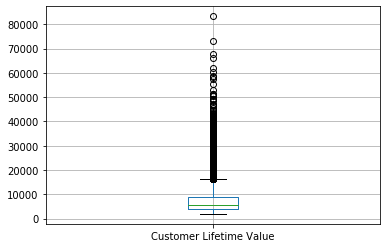

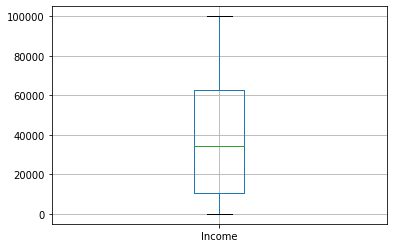

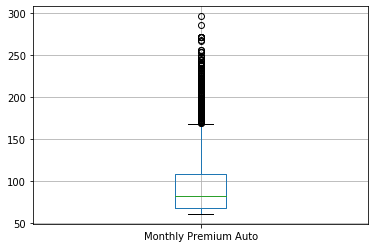

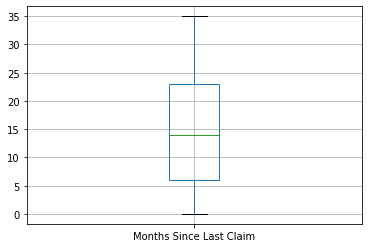

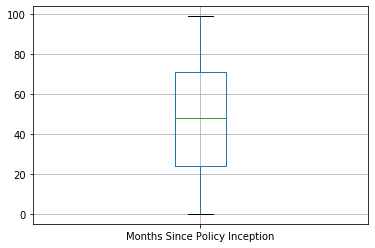

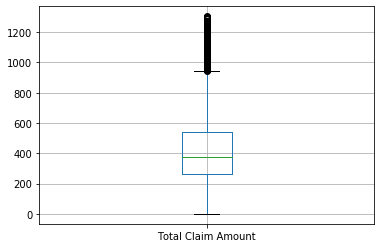

In [16]:
create_boxplots(df_clean, numeric_features)

In [17]:
def remove_outliers_quantile(df, col_name, quantile=0.95):
    quantile_value = np.quantile(df_clean[col_name], quantile)
    return df[df[col_name] < quantile_value]
    

In [18]:
df_clean = remove_outliers_quantile(df_clean, 'Customer Lifetime Value')
df_clean = remove_outliers_quantile(df_clean, 'Monthly Premium Auto')

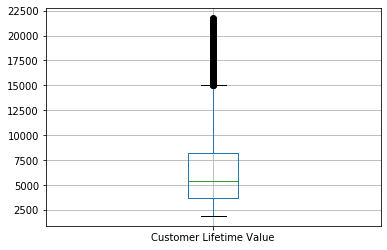

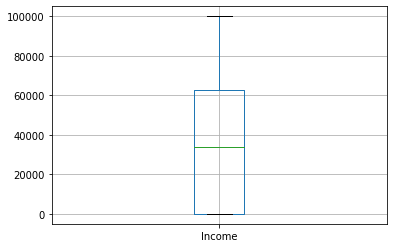

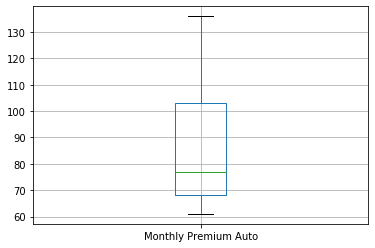

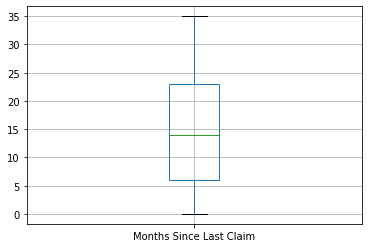

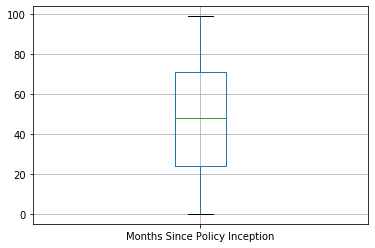

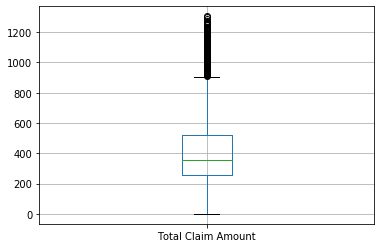

In [19]:
create_boxplots(df_clean, numeric_features)

In [20]:
df_clean.shape

(8076, 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EDAD5AFC50>,
      dtype=object)

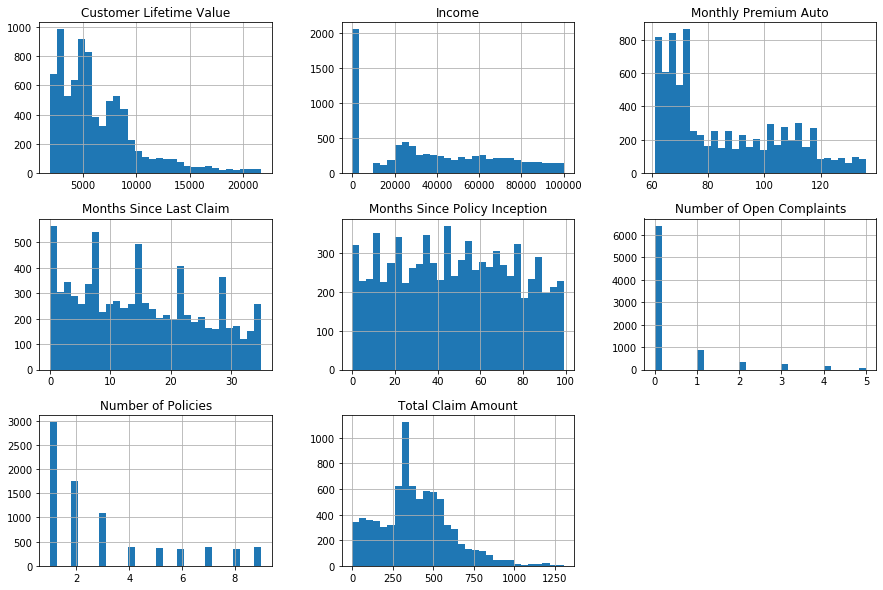

In [21]:
df_clean.hist(bins=30, figsize=(15, 10))